### # 【AIコース】大課題 ボストン住宅価格予測 決定木
## 課題 ボストン住宅価格予測 決定木

https://indatalabs.com/blog/data-science/datascience-project-exploratory-data-analysis#UhlzZ1qXbrVw4pks.99

https://qiita.com/aya_taka/items/4d3996b3f15aa712a54f

https://www.analyticsvidhya.com/blog/2015/06/infographic-cheat-sheet-data-exploration-python/

http://koumurayama.com/koujapanese/correlation.htm

https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score
# from sklearn.cross_validation import KFold
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score

### データを取得する

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

### 取得データをDataFrameにする

In [3]:
X_features = pd.DataFrame(boston.data, columns=boston.feature_names)
y_prices = pd.DataFrame(boston.target, columns=['MEDV'])

### データ探索

### 基本的なデータ探索

### 基本的なデータ探索について記述せよ
以下の観点をすべて含めて記述しましょう。

- このデータセットは何のデータセットであるか(何のために作成されたか、誰が作成したか、何年に作成されたか)
- それぞれのカラムは何を表しているのか

答え :
> D. Harrison, D.L. Rubinfeld が1978年に米国国勢調査のために収集された。後に'UCI Machine Learning Repository'の機械学習の材料として採用された。内容は，マサチューセッツ州ボストン郊外の506の住宅価格であり14カラムある。

- CRIM ; 人口 1 人当たりの犯罪発生数
- ZN ; 25,000 平方フィート以上の住居区画の占める割合 
- INDUS ; 小売業以外の商業が占める面積の割合 
- CHAS ; チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)  
- NOX ; NOx の濃度 
- RM ; 住居の平均部屋数 
- AGE ; 1940 年より前に建てられた物件の割合 
- DIS ; 5つのボストン市の雇用施設からの距離 (重み付け済) 
- RAD ; 環状高速道路へのアクセスしやすさ 
- TAX ; 10,000 ドルあたりの不動産税率の総計 
- PTRATIO ; 町毎の児童と教師の比率 
- B ; 町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk - 0.63)^2 

- LSTAT ; 給与の低い職業に従事する人口の割合 (%) 
- MEDV ; 住宅価格の中央値（単位 1,000ドル）

In [4]:
X_features.head()
# y_prices.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# メジアンMEDVカラムを表示する方法（boston.data, boston.targetを合体）
boston2 = pd.DataFrame(
    np.column_stack([boston.data, boston.target]), 
    columns=np.r_[boston.feature_names, ['MEDV']])
boston2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# 別解
boston3 = pd.read_csv('housing.csv', index_col=0)
boston3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 一変数の可視化

In [7]:
boston3.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# boston3.describe(include=['O']) # すべてのカラムは連続数値

In [9]:
boston3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 59.3 KB


### describeメソッドを用いることで把握できたこと(考察)を記述せよ
以下の観点をすべて含めて記述しましょう。

- 前処理に関して気をつけるべき点
- 機械学習の手法選択に活かせること
- 機械学習の特徴選択について考えられること

答え :
- 前処理に関して気をつけるべき点
    - 今回のデータにはないが，欠測値を削除するのか補完するのか選択しなければならない。特徴量には，名義，順序，数値があるがそれに応じた前処理が必要であるが，今回はすべて数値である。特徴に応じて採用するカラムを選択する。必ずやらなければならないのがデータの分割であるが，その前に分割手法を選択する必要がある。さらに，その前にモデルの選択をする必要があるが，いくつか試してもかまわない。
- 機械学習の手法選択に活かせること
    - 手法選択に大きな影響を与えるものは，カラムの数，カラムの特徴，特にテキストデータの有無，データ数，カラムどうしの関係などがある。選択した後に注意したいのは，ハイパーパラメータのチューニングである。
- 機械学習の特徴選択について考えられること
    - 分類か回帰かによって学習の事前に分かるものと事後に分かるものがある。例えば，線形回帰ならば相関をみるが，散布図によって非線形を選ぶこともできる。今回のデータに限って言えば，すべてのカラムが数値なので，いろいろ試すのがよい。

### 二変数の可視化

### 二変数の可視化　相関

### 二変数の可視化について記述せよ　相関
以下の観点をすべて含めて記述しましょう。

- そもそも相関とは何か
- MEDVにもっとも相関があると出力された変数を3つほどあげよ
- 相関がある変数を判明させることでどのように利用できそうか考察せよ（調査せよ）

答え :
- そもそも相関とは何か
    - 因果関係がある特徴量を相関があるといいます。散布図にして右上がりが正の相関，右下がりが負の相関といいます。線形も非線形もあります。因果関係がないみかけの相関もあります。可視化すれば少なくても何か関係ありそうであるかどうかが分かります。
- MEDVにもっとも相関があると出力された変数を3つほどあげよ
    - LSTAT, RM, PTRATIO
- 相関がある変数を判明させることでどのように利用できそうか考察せよ（調査せよ）
    - 相関係数は線形の関係性しかみれません。可視化すれば，線形か非線形かが分かり，ルートや対数で変換すると線形性が現れる場合があります。相関は外れ値に大きな影響を受けますが，可視化すればそれが判ります。
    - 過学習を軽減するためにはのデータの次元が少ない方がよいですが，次元をどうするかで学習モデルが選択できます。また，逆に，学習モデルによって扱える次元が決まったりしますので，結局，試すしかありません。いずれにしても，その判断には相関の影響を考慮すべきです。

### 相関の注意点について記述せよ
便利な相関であるが、落とし穴がある

- 相関が正しく2変数の関係を表していない時がある、それはどのような場合か
- その場合、どのような手段によって、確認するべきか

答え :
- 相関が正しく2変数の関係を表していない時がある、それはどのような場合か
    - 擬似相関は、2つの事象に因果関係がないのに、見えない要因によって因果関係があるかのように推測されること。例えば，タクシーの回転率とコンビニの傘の売り上げ。この場合の隠れた要因は雨である
- その場合、どのような手段によって、確認するべきか
    - 次の3つの条件が成り立たなければ、X が Y の原因であるつまり因果関係があると結論できない
        - X は Y に先行して発生しなければならない
        - Y は X が起きないときは発生してはならない
        - Y は X が起きたら必ず発生しなければならない

In [10]:
boston3.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


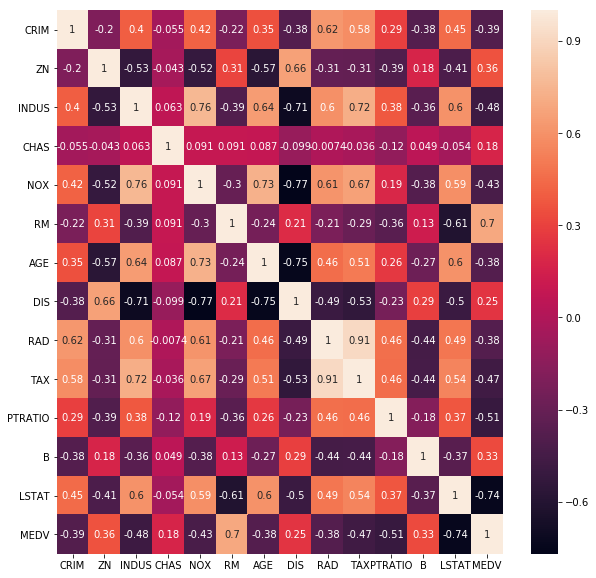

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(boston3.corr(), annot=True)
# plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

### 散布図

### 二変数の可視化　プロット

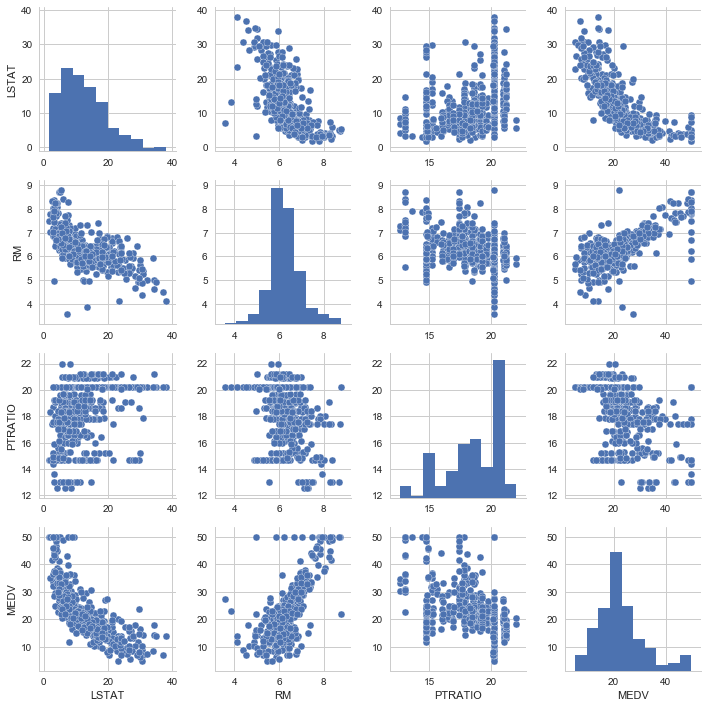

In [12]:
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'RM', 'PTRATIO', 'MEDV']

sns.pairplot(boston3[cols], size=2.5)
plt.tight_layout()
# plt.savefig('./figures/scatter.png', dpi=300)
plt.show()

### 二変数の可視化について記述せよ　プロット
それぞれのプロット結果から、今回の相関はそれぞれ信用できるか記述せよ。

答え :
- LSTATとは，負の相関であるが，明らかに非線形である。
- RMとは，正の線形の相関がある。
- PTRATIOとは，強くない負の相関がある。本来，連続値のはずだが，縦に数珠つなぎになっているのでなぜか離散値になっている。
> ３つとも因果関係がありそうなので信用できるのではないか

### データセット分割

深さの影響を見る目的なので，相関が一番強い'LSTAT'を横軸（特徴量）として選びます

In [13]:
X = X_features[['LSTAT']].values
y = y_prices.values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

### 学習

### 決定係数

深さ1,2,3でそれぞれ学習を行います（課題の指定）

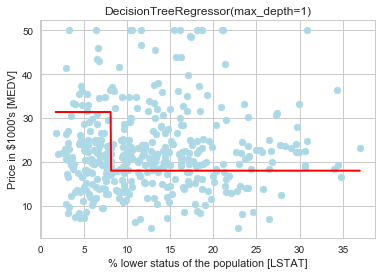

決定係数は0.246


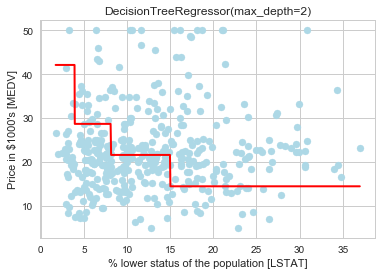

決定係数は0.411


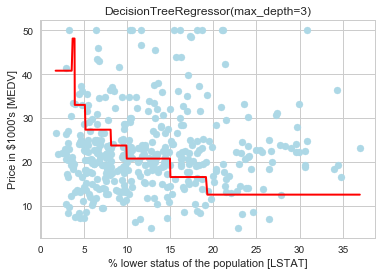

決定係数は0.516


In [14]:
for n in range(1, 4):
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    sort_idx = X_train.flatten().argsort()

    plt.scatter(X_train[sort_idx], y_train, c='lightblue')
    plt.plot(X_train[sort_idx], 
         tree.predict(X_train[sort_idx]), 
         color='red', 
         linewidth=2)    
    plt.title("DecisionTreeRegressor(max_depth=" + str(n) + ")")
    plt.xlabel('% lower status of the population [LSTAT]')
    plt.ylabel('Price in $1000\'s [MEDV]')
    # plt.savefig('./figures/tree_regression.png', dpi=300)
    plt.show()
    print("決定係数は{:.3f}".format(tree.score(X_test, y_test)))

In [15]:
X = X_features[['RM']].values
y = y_prices.values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

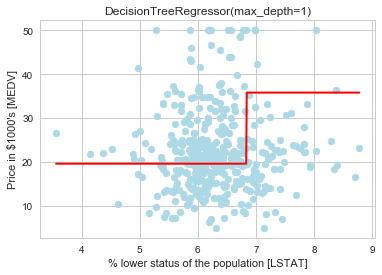

決定係数は0.388


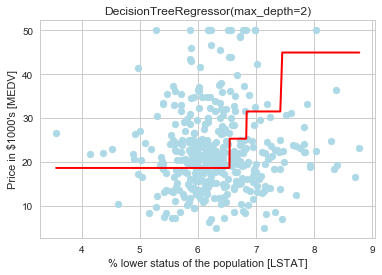

決定係数は0.471


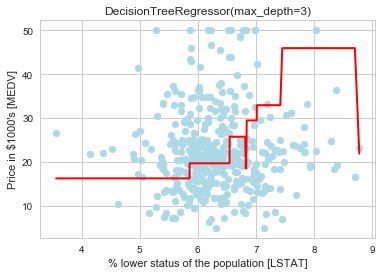

決定係数は0.506


In [16]:
for n in range(1, 4):
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    sort_idx = X_train.flatten().argsort()

    plt.scatter(X_train[sort_idx], y_train, c='lightblue')
    plt.plot(X_train[sort_idx], 
         tree.predict(X_train[sort_idx]), 
         color='red', 
         linewidth=2)    
    plt.title("DecisionTreeRegressor(max_depth=" + str(n) + ")")
    plt.xlabel('% lower status of the population [LSTAT]')
    plt.ylabel('Price in $1000\'s [MEDV]')
    # plt.savefig('./figures/tree_regression.png', dpi=300)
    plt.show()
    print("決定係数は{:.3f}".format(tree.score(X_test, y_test)))

In [17]:
X = X_features[['PTRATIO']].values
y = y_prices.values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

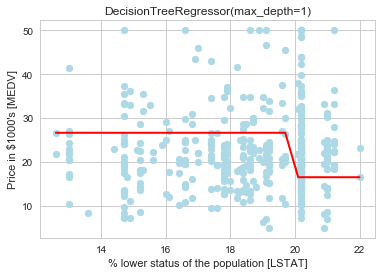

決定係数は0.049


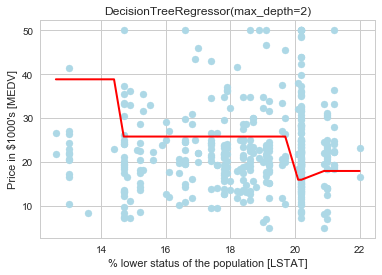

決定係数は0.070


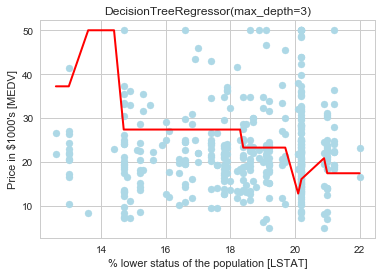

決定係数は0.081


In [18]:
for n in range(1, 4):
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    sort_idx = X_train.flatten().argsort()

    plt.scatter(X_train[sort_idx], y_train, c='lightblue')
    plt.plot(X_train[sort_idx], 
         tree.predict(X_train[sort_idx]), 
         color='red', 
         linewidth=2)    
    plt.title("DecisionTreeRegressor(max_depth=" + str(n) + ")")
    plt.xlabel('% lower status of the population [LSTAT]')
    plt.ylabel('Price in $1000\'s [MEDV]')
    # plt.savefig('./figures/tree_regression.png', dpi=300)
    plt.show()
    print("決定係数は{:.3f}".format(tree.score(X_test, y_test)))

In [19]:
X = X_features[['LSTAT', 'RM', 'PTRATIO']].values
y = y_prices.values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [20]:
for n in range(1, 4):
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    sort_idx = X_train.flatten().argsort()

    print("決定係数は{:.3f}".format(tree.score(X_test, y_test)))

決定係数は0.246
決定係数は0.565
決定係数は0.587


In [21]:
X = X_features.values
y = y_prices.values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [22]:
for n in range(1, 4):
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train, y_train)
    sort_idx = X_train.flatten().argsort()

    print("決定係数は{:.3f}".format(tree.score(X_test, y_test)))

決定係数は0.246
決定係数は0.565
決定係数は0.588


### 学習曲線

諸設定は課題そのまま

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

Automatically created module for IPython interactive environment


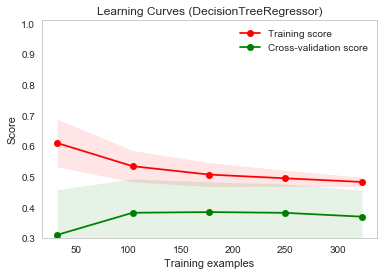

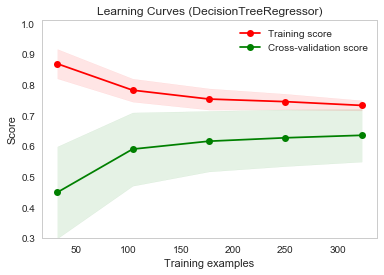

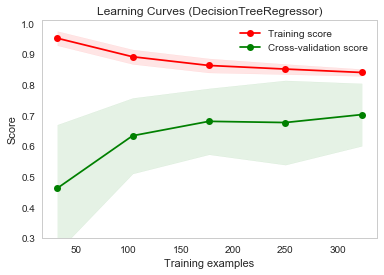

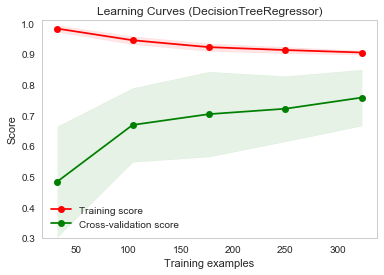

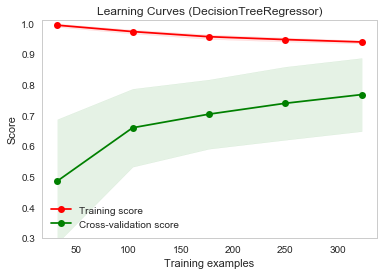

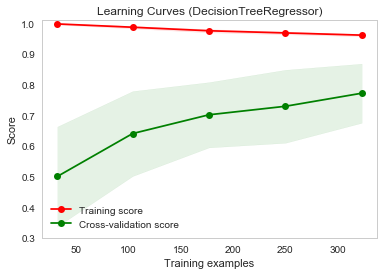

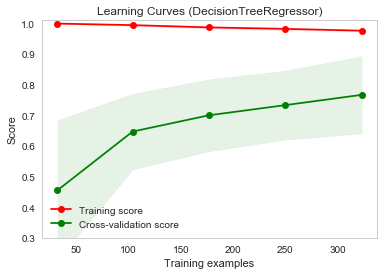

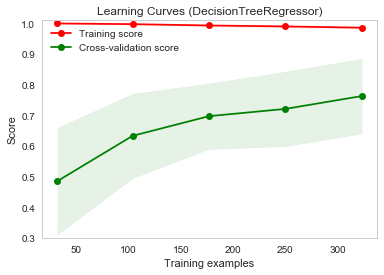

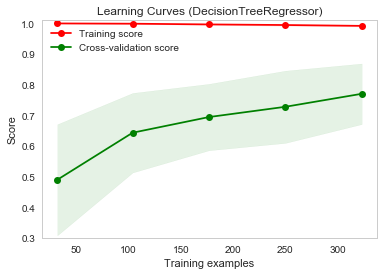

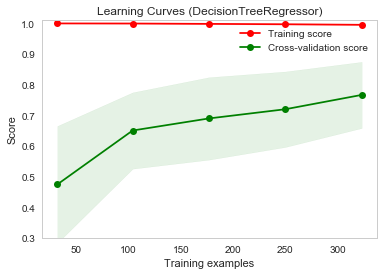

Wall time: 25.7 s


In [24]:
%%time
print(__doc__)

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor

title = "Learning Curves (DecisionTreeRegressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, 
                  test_size=0.2, 
                  random_state=1)
    
for degree in range(1, 11):
    estimator = DecisionTreeRegressor(max_depth=degree)
    plot_learning_curve(estimator, title, X_train, y_train, 
                        ylim=(0.3, 1.01), cv=cv, n_jobs=4)


### 学習曲線について記述せよ
- High varianceとは何か
- High Biasとは何か
- もっとも結果が良いと思われた深さをひとつ選択せよ
- なぜその深さが最も良いか記述せよ
- その最も結果が良いと思われる深さにおいて、データ数を増やしていくと、さらに結果は良くなるか記述せよ

答え :
- High varianceとは何か
    - 過学習の状態である
- High Biasとは何か
    - 学習不足の状態である
- もっとも結果が良いと思われた深さをひとつ選択せよ
    - 深さ = ３
- なぜその深さが最も良いか記述せよ
    - これ以上増やしても決定係数は増えず，学習曲線が収束しない，つまり，過学習になり汎化性能が上がらない。
- その最も結果が良いと思われる深さにおいて、データ数を増やしていくと、さらに結果は良くなるか記述せよ
    - 深さ = ３では学習曲線は収束していて，データ数を増やしても決定係数は目立って上がらない。

### ここからハイパーパラメーターのチューニングにテーマが代わります

### データセット分割

住宅価格の予測を，住宅の売買に利用しようとするのなら，顧客の情報を全部つかった方が商売として説明しやすい

例えば，顧客の住宅のある特徴量を変化させてみて，価格が変化するさまを営業トークとして使える

In [25]:
np.random.seed(6)
boston4 = boston2.reindex(np.random.permutation(boston2.index)). \
                            reset_index(drop=True)
X_all = boston4.drop(['MEDV'], axis=1)
# X_all = X_all.loc[:, ['LSTAT','RM','PTRATIO']] # でも決定係数：0.80が得られる
y_all = boston4['MEDV']

# y_all = pd.DataFrame(np.sqrt(y_all.values)) # でも決定係数：0.80が得られる

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size=0.20, 
                                                    random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


X_all = X_all.loc[:, ['LSTAT','RM','PTRATIO']] # でも決定係数：0.80が得られる

y_all = pd.DataFrame(np.sqrt(y_all.values))  # でも決定係数：0.80が得られる

log, log10 では決定係数が悪くなる

### グリッドサーチ

### グリッドサーチについて記述せよ
- グリッドサーチとは何か
- グリッドサーチと同じようにハイパーパラメーターを探索する手法を挙げよ
- その手法は、グリッドサーチと比べて、どの点で優れているか、どのように使い分けるべきか

答え :
- グリッドサーチとは何か
    - ハイパーパラメータのチューニングの手法の１つ。パラメータの組み合わせのすべてをしらみつぶしに学習していき，そのあと検証していく。
- グリッドサーチと同じようにハイパーパラメーターを探索する手法を挙げよ
    - ランダムサーチ
- その手法は、グリッドサーチと比べて、どの点で優れているか、どのように使い分けるべきか
    - ランダムサーチは，組み合わせをランダムに選んで試すので学習回数を減らせる。ディープラーニングなどハイパーパラメータが非常に多い場合に適用できる。ただし，時間の許すかぎり，総当たりのグリッドサーチを選択すべきと考える。

### グリッドサーチを使いこなそう

### テスト

グリッドサーチを使用して、1~11の深さの検証を行いましょう（課題の指定）

In [26]:
%%time
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer

regressor = DecisionTreeRegressor(random_state=0)

params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)

grid = GridSearchCV(estimator=regressor, 
                    param_grid=params, 
                    scoring='r2',
                    # scoring=make_scorer(r2_score),
                    cv=5)

grid.fit(X_train,y_train)
print(grid.best_params_)
print("R^2 cv: {:.3f}".format(grid.score(X_train, y_train)))

clf = grid.best_estimator_
clf.fit(X_train, y_train)
print("R^2 train: {:.3f}".format(clf.score(X_train, y_train)))
# 検証データによる検証
print("R^2 test: {:.3f}".format(clf.score(X_test, y_test)))

{'max_depth': 5}
R^2 cv: 0.927
R^2 train: 0.927
R^2 test: 0.867
Wall time: 175 ms


テストデータで，決定係数：0.80以上が得られたので，課題クリア

### クロスバリデーション（グリッドサーチの結果を基に）（不要と考える）

In [27]:
%%time
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, 
              shuffle=True, # 分類ではシャッフルする
              random_state=0
             )

scores = cross_val_score(estimator=clf,
                         X=X_all,
                         y=y_all,
                         scoring='r2',
                         cv=kfold) # KFoldを使ってクロスバリデーション
# print('R^2: {}'.format(scores))
print('accuracy: {}'.format(np.round(scores,3)))
print('accuracy: Mean{:.3f} +/- {:.3f}'.format(np.mean(scores), np.std(scores)))

accuracy: [ 0.847  0.892  0.764  0.795  0.782  0.865  0.575  0.778  0.67   0.861]
accuracy: Mean0.783 +/- 0.093
Wall time: 49 ms


全データを使ったクロスバリデーションの決定係数は，テストデータのそれより若干悪い

グリッドサーチ内のクロスバリデーションの折りたたみ回数を3回と10回にて検証（課題の指定）

In [28]:
%%time
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer

regressor = DecisionTreeRegressor(random_state=0)

params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)

grid = GridSearchCV(estimator=regressor, 
                    param_grid=params, 
                    scoring='r2',
                    # scoring=make_scorer(r2_score),
                    cv=3)

grid.fit(X_train,y_train)
print(grid.best_params_)
print("R^2 cv: {:.3f}".format(grid.score(X_train, y_train)))

clf = grid.best_estimator_
clf.fit(X_train, y_train)
print("R^2 train: {:.3f}".format(clf.score(X_train, y_train)))
# 検証データによる検証
print("R^2 test: {:.3f}".format(clf.score(X_test, y_test)))

{'max_depth': 9}
R^2 cv: 0.985
R^2 train: 0.985
R^2 test: 0.846
Wall time: 104 ms


In [29]:
%%time
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer

regressor = DecisionTreeRegressor(random_state=0)

params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)

grid = GridSearchCV(estimator=regressor, 
                    param_grid=params, 
                    scoring='r2',
                    # scoring=make_scorer(r2_score),
                    cv=10)

grid.fit(X_train,y_train)
print(grid.best_params_)
print("R^2 cv: {:.3f}".format(grid.score(X_train, y_train)))

clf = grid.best_estimator_
clf.fit(X_train, y_train)
print("R^2 train: {:.3f}".format(clf.score(X_train, y_train)))
# 検証データによる検証
print("R^2 test: {:.3f}".format(clf.score(X_test, y_test)))

{'max_depth': 5}
R^2 cv: 0.927
R^2 train: 0.927
R^2 test: 0.867
Wall time: 337 ms


scoring=make_scorer(mean_squared_error) を試す（課題の指定）

In [30]:
regressor = DecisionTreeRegressor()
params = {"max_depth":  list(range(1,11))}
scoring_fnc=make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor, 
                    param_grid=params, 
                    # scoring='r2',
                    scoring=make_scorer(mean_squared_error),
                    cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)
print("MSE cv: {:.3f}".format(grid.score(X_train, y_train)))

clf10 = grid.best_estimator_
clf10.fit(X_train, y_train)
print("R^2 train: {:.3f}".format(clf10.score(X_train, y_train)))
# 検証データによる検証
print("R^2 test: {:.3f}".format(clf10.score(X_test, y_test)))

{'max_depth': 1}
MSE cv: 47.326
R^2 train: 0.449
R^2 test: 0.404
